## redo of k-mer overlay with experimental data

### need data (k-mers vs. SRR1520311-Galaxy53-Rm_rRNA_on_data_17)
- **`--norc -v 2 -p 4 -m 1 `**
- **`--norc -a -v2 -p4`**

## filepaths (coverage csv's and alignment logfiles)
```
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/v3_simreads_FILTERED1-alignment--norc-v2-p4-m1/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/v3_simreads_FILTERED1-alignment--norc-a-v2-p4/YMR186W-v3_simreads_FILTERED1--norc-a-v2-p4.csv'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/SRR1520311-Galaxy53-Rm_rRNA_on_data_17/SRR1520311-Galaxy53-Rm_rRNA_on_data_17-alignment--norc-a-v2-p4/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/SRR1520311-Galaxy53-Rm_rRNA_on_data_17/SRR1520311-Galaxy53-Rm_rRNA_on_data_17-alignment--norc-v2-p4-m1/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv'

'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/v3_simreads_FILTERED1-alignment--norc-v2-p4-m1/logfile.txt'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/v3_simreads_FILTERED1-alignment--norc-a-v2-p4/logfile.txt'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/SRR1520311-Galaxy53-Rm_rRNA_on_data_17/SRR1520311-Galaxy53-Rm_rRNA_on_data_17-alignment--norc-a-v2-p4/logfile.txt'
'../../alignments/flash-alignments-do_not_touch/final_alignments3/Yeast/orf_coding-FILTERED1/SRR1520311-Galaxy53-Rm_rRNA_on_data_17/SRR1520311-Galaxy53-Rm_rRNA_on_data_17-alignment--norc-v2-p4-m1/logfile.txt'
```
- copy them all with `./copy_script.sh`

In [3]:
'''
Created by: Jackson Halpin
Date: 7/25/18
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
np.set_printoptions(suppress=True)
from optimal_colors import op_colors
from matplotlib import cycler
colors = cycler('color',op_colors())
# colors = cycler('color', ['#bb2c23', '#3388BB', '#7458e2', '#31b93b', '#f57f1f', '#2fded9'])
plt.rc('axes', facecolor='w', edgecolor='k',
       linewidth=1.5, grid=False, prop_cycle=colors, labelcolor='k')
plt.rc('grid', color='k', linestyle='solid', linewidth=0)
plt.rc('xtick', direction='in', color='k')
plt.rc('xtick.major', width=1.5, size=5)
plt.rc('ytick', direction='in', color='k')
plt.rc('ytick.major', width=1.5, size=5)
plt.rc('patch', edgecolor='k', linewidth=1,
       force_edgecolor=True)  # patch is like bar
plt.rc('lines', linewidth=1.5)
plt.rc('font', size=16, **{'family': 'sans-serif', 'sans-serif': ['Arial']})
plt.rc('figure', figsize=(11, 7))
plt.rc('text',color='k')
# plt.rcParams.keys()
plt.rcParams.update()

In [5]:
!bash ./copy_script.sh

mkdir: files: File exists


In [6]:
!tree

.
├── copy_script.sh
├── files
│   ├── YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv
│   ├── YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv
│   ├── YMR186W-v3_simreads_FILTERED1--norc-a-v2-p4.csv
│   ├── YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv
│   └── logfiles
│       ├── SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4_logfile.txt
│       ├── SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1_logfile.txt
│       ├── v3_simreads_FILTERED1--norc-a-v2-p4_logfile.txt
│       └── v3_simreads_FILTERED1--norc-v2-p4-m1_logfile.txt
├── notebook1.ipynb
└── readme.md

2 directories, 11 files


In [11]:
!find . -name "*csv"

./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv
./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv
./files/YMR186W-v3_simreads_FILTERED1--norc-a-v2-p4.csv
./files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv


In [12]:
ls ./files/*csv

./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv
./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv
./files/YMR186W-v3_simreads_FILTERED1--norc-a-v2-p4.csv
./files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv


### new regex parsing of filename

In [6]:
import re

files=['./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv',
'./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv',
'./files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv']

pattern = re.compile(r'(.{7})(-SRR1520311|-v3_simreads_FILTERED1).*?--norc(-\w{1,2}-\w{2}-\w{2})\.csv')

file_params = {}
for i in files:
    match1 = re.search(pattern,i)
    file_params[i] = match1.groups()

#### regex results

In [35]:
print(files)

['./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv', './files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv', './files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv']


In [36]:
print(file_params)

{'./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv': ('YMR186W', '-SRR1520311', '-a-v2-p4'), './files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv': ('YMR186W', '-SRR1520311', '-v2-p4-m1'), './files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv': ('YMR186W', '-v3_simreads_FILTERED1', '-v2-p4-m1')}


In [37]:
print('''
filename: {}
gene: {}
experiment: {}
alignment parameters: {}
alternate name: {}
'''.format(files[0],file_params[files[0]][0],file_params[files[0]][1],file_params[files[0]][2],''.join(file_params[files[0]])))


filename: ./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv
gene: YMR186W
experiment: -SRR1520311
alignment parameters: -a-v2-p4
alternate name: YMR186W-SRR1520311-a-v2-p4



In [27]:
import pandas as pd

In [38]:
pd.DataFrame(file_params)

,./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv,./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv,./files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv
0,YMR186W,YMR186W,YMR186W
1,-SRR1520311,-SRR1520311,-v3_simreads_FILTERED1
2,-a-v2-p4,-v2-p4-m1,-v2-p4-m1


In [39]:
filedf = pd.DataFrame(file_params).T.reset_index()
filedf.columns = ['filename','gene','experiment','alignment_parameters']
filedf

,filename,gene,experiment,alignment_parameters
0,./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on...,YMR186W,-SRR1520311,-a-v2-p4
1,./files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on...,YMR186W,-SRR1520311,-v2-p4-m1
2,./files/YMR186W-v3_simreads_FILTERED1--norc-v2...,YMR186W,-v3_simreads_FILTERED1,-v2-p4-m1


---

In [7]:
def filename_parser(files):
    '''
    input list of coverage csv filepaths
    '''
    import re
    pattern = re.compile(r'(.{7})(-SRR1520311|-v3_simreads_FILTERED1).*?--norc(-\w{1,2}-\w{2}-\w{2})\.csv')
    file_params = {}
    for i in files:
        match1 = re.search(pattern,i)
        file_params[i] = match1.groups()
    return file_params

In [8]:
def ribo_prof_ave_norm(df):
    df['norm_cov'] = df['read_depth']/df['read_depth'].mean()
    return df

In [9]:
def import_cov(filename,suffix):
    df = pd.read_csv(filename,usecols=['position','read_depth'])
    df['norm_cov'] = df['read_depth']/df['read_depth'].mean()
    df.columns = ['position','read_depth-'+suffix,'norm_cov-'+suffix]
    return df

In [10]:
def merge_export(filename1,filename2):
    file_params = filename_parser([filename1,filename2])
    suffix1,suffix2 = (''.join(file_params[filename1]),''.join(file_params[filename2]))
    df1,df2 = (import_cov(filename1,suffix1),import_cov(filename2,suffix2))
    df = pd.merge(df1,df2,on='position')
    gene1, exp1, param1 = file_params[filename1]
    gene2, exp2, param2 = file_params[filename2]
    if gene1 != gene2:
        raise Exception('error: trying to merge 2 different transcripts')
    df.to_csv('{}{}_vs_{}_position_merged.csv'.format(gene1,exp1+param1,exp2.replace('-','')+param2))
    return df

In [11]:
data_a = './files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-a-v2-p4.csv'
data_m1 = './files/YMR186W-SRR1520311-Galaxy53-Rm_rRNA_on_data_17--norc-v2-p4-m1.csv'
k_mer_m1 = './files/YMR186W-v3_simreads_FILTERED1--norc-v2-p4-m1.csv'

## still need to do area normalization - maybe add to import_cov function

In [12]:
df = merge_export(data_a,data_m1)

In [74]:
ls

YMR186W-SRR1520311-a-v2-p4_vs_SRR1520311-v2-p4-m1_position_merged.csv
copy_script.sh
files/
merge_data_and_k-mer_hsp90s.py*
notebook1.ipynb
readme.md
regex_test.py


In [13]:
df.head()

,position,read_depth-YMR186W-SRR1520311-a-v2-p4,norm_cov-YMR186W-SRR1520311-a-v2-p4,read_depth-YMR186W-SRR1520311-v2-p4-m1,norm_cov-YMR186W-SRR1520311-v2-p4-m1
0,1,113,0.057874,2,0.002503
1,2,130,0.066581,2,0.002503
2,3,192,0.098335,5,0.006257
3,4,279,0.142893,8,0.010011
4,5,317,0.162355,10,0.012514


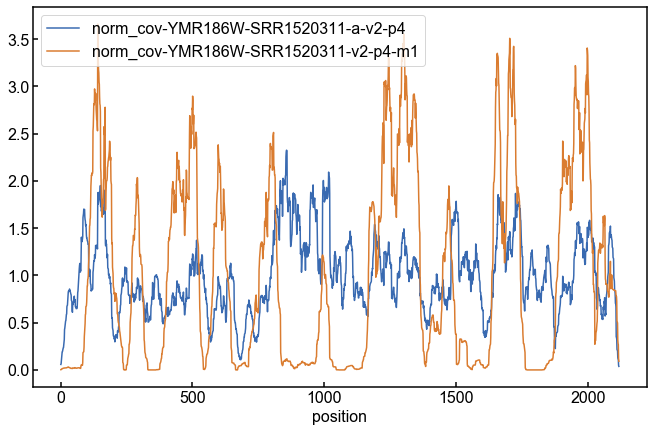

In [14]:
df.set_index('position')[['norm_cov-YMR186W-SRR1520311-a-v2-p4','norm_cov-YMR186W-SRR1520311-v2-p4-m1']].plot()



In [15]:
df_2 = merge_export(data_m1,k_mer_m1)

In [16]:
df_2.head()

,position,read_depth-YMR186W-SRR1520311-v2-p4-m1,norm_cov-YMR186W-SRR1520311-v2-p4-m1,read_depth-YMR186W-v3_simreads_FILTERED1-v2-p4-m1,norm_cov-YMR186W-v3_simreads_FILTERED1-v2-p4-m1
0,1,2,0.002503,0,0.0
1,2,2,0.002503,0,0.0
2,3,5,0.006257,0,0.0
3,4,8,0.010011,0,0.0
4,5,10,0.012514,0,0.0


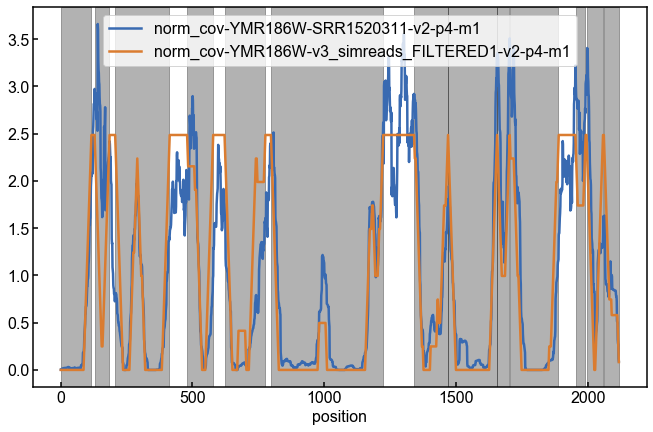

In [22]:
fig,ax = plt.subplots()
df_2.set_index('position')[['norm_cov-YMR186W-SRR1520311-v2-p4-m1','norm_cov-YMR186W-v3_simreads_FILTERED1-v2-p4-m1']].plot(linewidth=2.5,ax=ax)
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(df_2.position, 0, 1, where=df_2['read_depth-YMR186W-v3_simreads_FILTERED1-v2-p4-m1']<30, color='k', alpha=0.3, transform=trans)
# plt.savefig(filename,format='jpg',dpi=200)